In [18]:
class Person:
    aa = 33
    def __init__(self, name, age):
        self.name = name
        self.age = age * self.aa

class Person2:
    
    def __init__(self, name, age):
        self.__name = name
        self.__age = age

In [14]:
perso = Person("nico", 32)
perso2 = Person2("nicoo", 33)
perso.age = 31
perso.age
perso2.__dict__

{'_Person2__name': 'nicoo', '_Person2__age': 33}

In [1]:
# If not in the PYTHONPATH
# The following code adds the path where all the modules are included
import sys, os
functions = os.path.join(os.getcwd(),"functions")
if functions not in sys.path:
    sys.path.append(functions)
    print("added %s to the sys.path" %functions)

added /home/nicola/Documenti/Python/Financial-Stochastic-Models/functions to the sys.path


In [6]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.linalg import norm
from IPython.display import display
import sympy; sympy.init_printing()
#from functions.Solvers import Thomas, SOR, SOR2

def display_matrix(m):
    display(sympy.Matrix(m))

In [2]:
A = np.array([[10, 5, 0, 0], [2, 10, 5, 0], [0, 2, 10, 5], [0, 0, 2, 10]], dtype=np.float64) 
#A = np.array([[10, 5, 0, 0], [2, 15, 2, 0], [0, 8, 13, 1], [0, 0, 1, 8]], dtype=np.float64) 
#print("Matrix A with Rank: ",np.linalg.matrix_rank(A))
#display_matrix(A)
#print("b:")
x = np.array([[1.],[2.],[3.],[4.]])
B = A @ x
#display_matrix(b)

In [3]:
aa = 2.; bb = 10.; cc=5.

In [6]:
A

array([[10.,  5.,  0.,  0.],
       [ 2., 10.,  5.,  0.],
       [ 0.,  2., 10.,  5.],
       [ 0.,  0.,  2., 10.]])

In [28]:
from scipy import sparse
from scipy.sparse.linalg import splu
from scipy.sparse.linalg import spsolve

In [5]:
r = 0.1; sig = 0.2                
S0 = 100; X0 = np.log(S0)          
K = 100; Texpir = 1            

Nspace = 5   # M space steps
Ntime = 4    # N time steps   
S_max = 3*float(K)                
S_min = float(K)/3
x_max = np.log(S_max)  # A2
x_min = np.log(S_min)  # A1
x, dx = np.linspace(x_min, x_max, Nspace, retstep=True)   # space discretization
T, dt = np.linspace(0, Texpir, Ntime, retstep=True)       # time discretization
Payoff = np.maximum(np.exp(x)-K,0)          # Call payoff
V = np.zeros((Nspace,Ntime))       # grid initialization
offset = np.zeros(Nspace-2)        # vector to be used for the boundary terms   
V[:,-1] = Payoff                   # terminal conditions 
V[-1,:] = np.exp(x_max) - K * np.exp(-r* T[::-1] )  # boundary condition
V[0,:] = 0 
# construction of the tri-diagonal matrix D
sig2 = sig*sig; dxx = dx * dx
a = ( (dt/2) * ( (r-0.5*sig2)/dx - sig2/dxx ) )
b = ( 1 + dt * ( sig2/dxx + r ) )
c = (-(dt/2) * ( (r-0.5*sig2)/dx + sig2/dxx ) )
#D = sparse.diags([a, b, c], [-1, 0, 1], shape=(Nspace-2, Nspace-2)).toarray()

In [122]:
%%time
# Backward iteration
for i in range(Ntime-2,-1,-1):
    offset[0] = a * V[0,i]
    offset[-1] = c * V[-1,i]; 
    V[1:-1,i] = SOR_trid5( a,b,c, (V[1:-1,i+1] - offset), w=1.68, eps=1e-10, N_max=600 )    

CPU times: user 36.8 s, sys: 16 ms, total: 36.8 s
Wall time: 36.9 s


In [104]:
# finds the option at S0
oPrice = np.interp(X0, x, V[:,0])
print(oPrice)

13.269408169918657


In [1]:
from functions.Parameters import Option_param
from functions.Processes import Diffusion_process, Merton_process
from functions.BS_pricer import BS_pricer
from functions.Merton_pricer import Merton_pricer 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creates the object with the parameters of the option
opt_param = Option_param(S0=100, K=100, T=1, exercise="European", payoff="put" )

# Creates the object with the parameters of the process
Merton_param = Merton_process(r=0.1, sig=0.25, lam=0.08, muJ=0, sigJ=0.5)
diff_param = Diffusion_process(r=0.1, sig=0.2)  # np.sqrt(Merton_param.var)

print("standard deviation: ", np.sqrt(Merton_param.var) )
print("Skewness: ", Merton_param.skew)
print("kurtosis: ", Merton_param.kurt)

# Creates the object of the pricer
BS = BS_pricer(opt_param, diff_param)
Merton = Merton_pricer(opt_param, Merton_param)

standard deviation:  0.2872281323269014
Skewness:  0.0
kurtosis:  4.407713498622589


In [11]:
BS.PDE_price((7000,4000), Time=True)

(3.753259052966803, 1.4641542434692383)

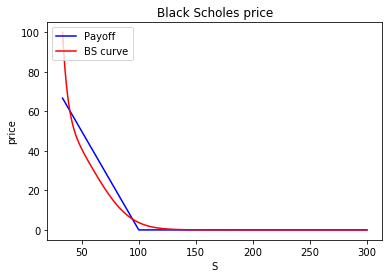

In [12]:
BS.plot()

In [3]:
Merton.PIDE_price((5000,4000), Time=True)

(6.18125580749721, 5.347105026245117)

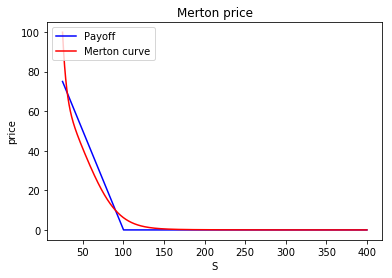

In [4]:
Merton.plot()

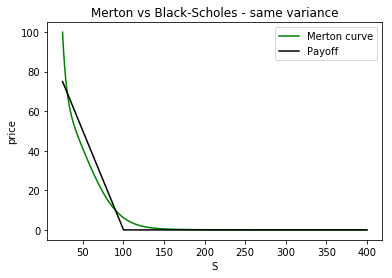

In [7]:
#plt.plot(BS.S_vec, BS.price_vec, color='red',label="BS curve")
plt.plot(Merton.S_vec, Merton.price_vec, color='green',label="Merton curve")
plt.plot(Merton.S_vec, Merton.payoff_f(Merton.S_vec), color='black',label="Payoff")
#plt.axis([5, 35, 0, 25])
plt.xlabel("S"); plt.ylabel("price"); plt.title("Merton vs Black-Scholes - same variance")
plt.legend()
#plt.savefig("Mert-BS_same_var.png")

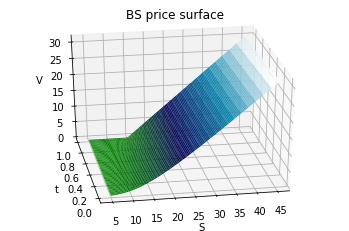

In [6]:
BS.mesh_plt()

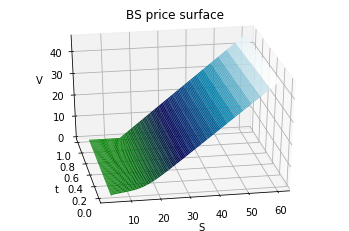

In [7]:
Merton.mesh_plt()